### Importing all the libraries needed.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Declaring the dataset provided for testing and training.

In [2]:
training_dataset = ([[780, 4, 3, 1],
                     [750, 3.9, 4, 1],
                     [690, 3.3, 3, 0],
                     [710, 3.7, 5, 1],
                     [680, 3.9, 4, 0],
                     [730, 3.7, 6, 1],
                     [690, 2.3, 1, 0],
                     [720, 3.3, 4, 1],
                     [740, 3.3, 5, 1],
                     [690, 1.7, 1, 0],
                     [610, 2.7, 3, 0],
                     [690, 3.7, 5, 1],
                     [710, 3.7, 6, 1],
                     [680, 3.3, 4, 0],
                     [770, 3.3, 3, 1],
                     [610, 3, 1, 0],
                     [580, 2.7, 4, 0],
                     [650, 3.7, 6, 1],
                     [540, 2.7, 2, 0],
                     [590, 2.3, 3, 0],
                     [620, 3.3, 2, 1],
                     [600, 2, 1, 0],
                     [550, 2.3, 4, 0],
                     [550, 2.7, 1, 0],
                     [570, 3, 2, 0],
                     [670, 3.3, 6, 1],
                     [660, 3.7, 4, 1],
                     [580, 2.3, 2, 0],
                     [650, 3.7, 6, 1],
                     [660, 3.3, 5, 1],
                     [640, 3, 1, 0],
                     [620, 2.7, 2, 0],
                     [660, 4, 4, 1],
                     [660, 3.3, 6, 1],
                     [680, 3.3, 5, 1],
                     [650, 2.3, 1, 0],
                     [670, 2.7, 2, 0],
                     [580, 3.3, 1, 0],
                     [590, 1.7, 4, 0],
                     [690, 3.7, 5, 1]])

testing_dataset = ([[590, 2, 3],
                    [740, 3.7, 4],
                    [680, 3.3, 6],
                    [610, 2.3, 1],
                    [710, 3, 5]])

### Converting the data type to dataframe using pandas.DataFrame

In [3]:
training_dataset = pd.DataFrame(training_dataset, columns = ['gmat','gpa','work_experience', 'admitted'])
testing_dataset = pd.DataFrame(testing_dataset, columns = ['gmat','gpa','work_experience'])
print(training_dataset) 
print(testing_dataset)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

### Dividing the dataset into X and y where X are the features and y is the target/label.

In [4]:
X = training_dataset[['gmat', 'gpa', 'work_experience']]
y = training_dataset[['admitted']]
print(X[:5], y[:5])

   gmat  gpa  work_experience
0   780  4.0                3
1   750  3.9                4
2   690  3.3                3
3   710  3.7                5
4   680  3.9                4    admitted
0         1
1         1
2         0
3         1
4         0


### Normalizing the X (features).

In [5]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))
X[:5]

,gmat,gpa,work_experience
0,1.000000,1.000000,0.4
1,0.875000,0.956522,0.6
2,0.625000,0.695652,0.4
3,0.708333,0.869565,0.8
4,0.583333,0.956522,0.6


### __init__: the initial function to declare the learning rate and the number of iterations.
### fit: m is the number of columns and n is the number of rows. Initializing weight and bias to 0. We update the weight everytime one iteration is complete.
### update_weights: A here is sigmoid(wx+b), tmp is calculating the gradient function (minimize loss), and then just updating the bias and weight by multiplying with the learning rate.
### predict: this is the function to make the predictions. 

In [6]:
class LogisticRegression() :
  def __init__(self, learning_rate, iterations):		
    self.learning_rate = learning_rate
    self.iterations = iterations
    
  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.W = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    
    for i in range(self.iterations):
      self.update_weights()
    
    return self
    
  def update_weights(self):
    A = 1 / (1 + np.exp( - (self.X.dot( self.W ) + self.b)))
    
    tmp = (A - self.Y.T)
    tmp = np.reshape(tmp, self.m)
    dW = np.dot(self.X.T, tmp) / self.m
    db = np.sum(tmp) / self.m
    
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    
    return self
    
  def predict(self, X):	
    Z = 1 / (1 + np.exp( - (X.dot(self.W) + self.b)))
    Y = np.where(Z > 0.5, 1, 0)
    
    return Y

### Splitting X and y into training and validation sets using train_test_split().

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((32, 3), (8, 3), (32, 1), (8, 1))

### Reshaping the size of the values.

In [9]:
X_train = X_train.values.reshape(32, 3)
y_train = y_train.values.reshape(32, 1)

In [10]:
X_valid = X_valid.values.reshape(8, 3)
y_valid = y_valid.values.reshape(8, 1)

### Executing the LogisticRegression function just made above with a learning rate of 0.01 and 1000 iterations

In [11]:
regressor = LogisticRegression(learning_rate = 0.01, iterations = 1000)

In [12]:
regressor.fit(X_train, y_train)
val_prediction = regressor.predict(X_valid)

In [13]:
test_prediction = regressor.predict(testing_dataset)

### A function to get the accuracy of the model.

In [14]:
correct = 0
count = 0    
for count in range(np.size(val_prediction)):
  if y_valid[count] == val_prediction[count]:
    correct = correct + 1

In [15]:
print("Validation Accuracy: ", (correct / count ) * 100)

Validation Accuracy:  71.42857142857143


In [16]:
test_prediction

array([1, 1, 1, 1, 1])

### Confusion Matrix on the Validation Set

In [17]:
cf = confusion_matrix(y_valid, val_prediction)

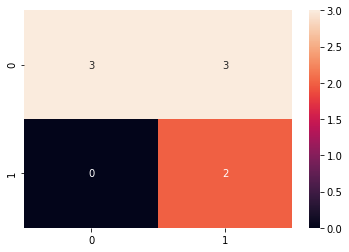

In [18]:
import seaborn as sns
sns.heatmap(cf, annot=True)

### References: https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/